In [34]:
!ls ../airflow/plugins/utils/

db.py  __pycache__  strategy.py  tinkoff.py


In [35]:
import sys 
sys.path.insert(0, '../airflow/plugins/utils/')

In [36]:
import pandas as pd
import numpy as np
import db
import matplotlib.pyplot as plt

In [37]:
def _get_db_url(connector: str) -> str:
    return f'user=trader password=income host=localhost port=5432 dbname=stocks'

In [38]:
db._get_db_url = _get_db_url

In [39]:
data = db.get_data_from_table('aaaa', 'aapl')

In [40]:
data

,time,open,high,low,close,volume
0,2020-12-21 07:00:00,127.63,132.00,123.13,128.25,30421273
1,2020-12-22 07:00:00,128.75,134.38,127.25,131.88,31510984
2,2020-12-23 07:00:00,130.50,132.75,130.50,131.00,20511617
3,2020-12-24 07:00:00,131.13,133.50,130.63,132.00,9470208
4,2020-12-28 07:00:00,133.13,137.38,131.75,136.75,23459873
...,...,...,...,...,...,...
246,2021-12-13 04:00:00,179.00,182.25,175.25,175.75,27970084
247,2021-12-14 04:00:00,175.63,178.13,174.38,174.38,30671309
248,2021-12-15 04:00:00,173.75,180.00,172.25,179.25,28111891
249,2021-12-16 04:00:00,179.13,181.13,170.75,172.25,32089783


In [41]:
SMA = 30
DEV = 2

In [42]:
data['sma'] = data['close'].rolling(SMA).mean()

In [43]:
std = data['close'].rolling(SMA).std() * DEV

In [44]:
data['lower'] = data['sma'] - std
data['upper'] = data['sma'] + std

<AxesSubplot:title={'center':'Bollinger Bands with SMA: 30 and 2 std'}>

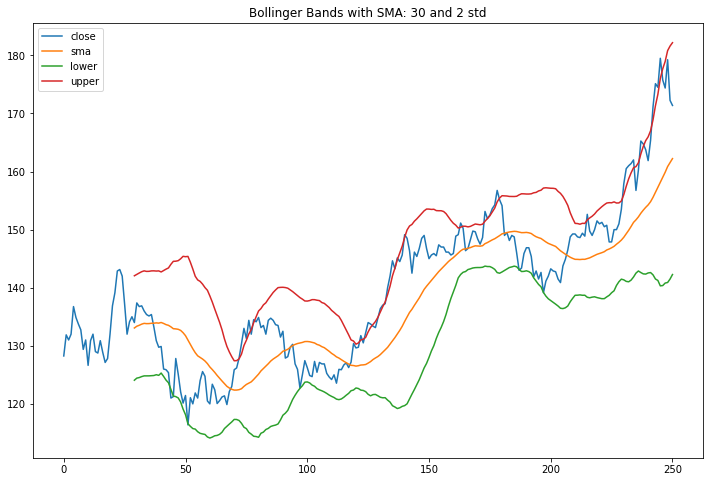

In [45]:
data[['close', 'sma', 'lower', 'upper']] \
    .plot(figsize=(12,8), title=f'Bollinger Bands with SMA: {SMA} and {DEV} std')

In [46]:
data['distance'] = data['close'] - data['sma']

In [47]:
data['position'] = np.where(data['close'] < data['lower'], 1 ,np.nan)

In [48]:
data['position'] = np.where(data['close'] > data['upper'], -1, data['position'])

In [49]:
data['position'] = np.where(data['distance'] * data['distance'].shift(1) < 0, 0, data['position'])

In [51]:
data['position'] = data['position'].ffill().fillna(0)

In [55]:
data['position'].value_counts()

-1.0    106
 0.0    100
 1.0     45
Name: position, dtype: int64

In [56]:
data.tail()

,time,open,high,low,close,volume,sma,lower,upper,distance,position
246,2021-12-13 04:00:00,179.00,182.25,175.25,175.75,27970084,159.034667,140.368806,177.700528,16.715333,-1.0
247,2021-12-14 04:00:00,175.63,178.13,174.38,174.38,30671309,159.880667,140.800735,178.960598,14.499333,-1.0
248,2021-12-15 04:00:00,173.75,180.00,172.25,179.25,28111891,160.855667,140.895907,180.815427,18.394333,-1.0
249,2021-12-16 04:00:00,179.13,181.13,170.75,172.25,32089783,161.547333,141.491231,181.603435,10.702667,-1.0
250,2021-12-17 04:00:00,172.25,173.50,169.13,171.38,74824907,162.226667,142.268494,182.184839,9.153333,-1.0
